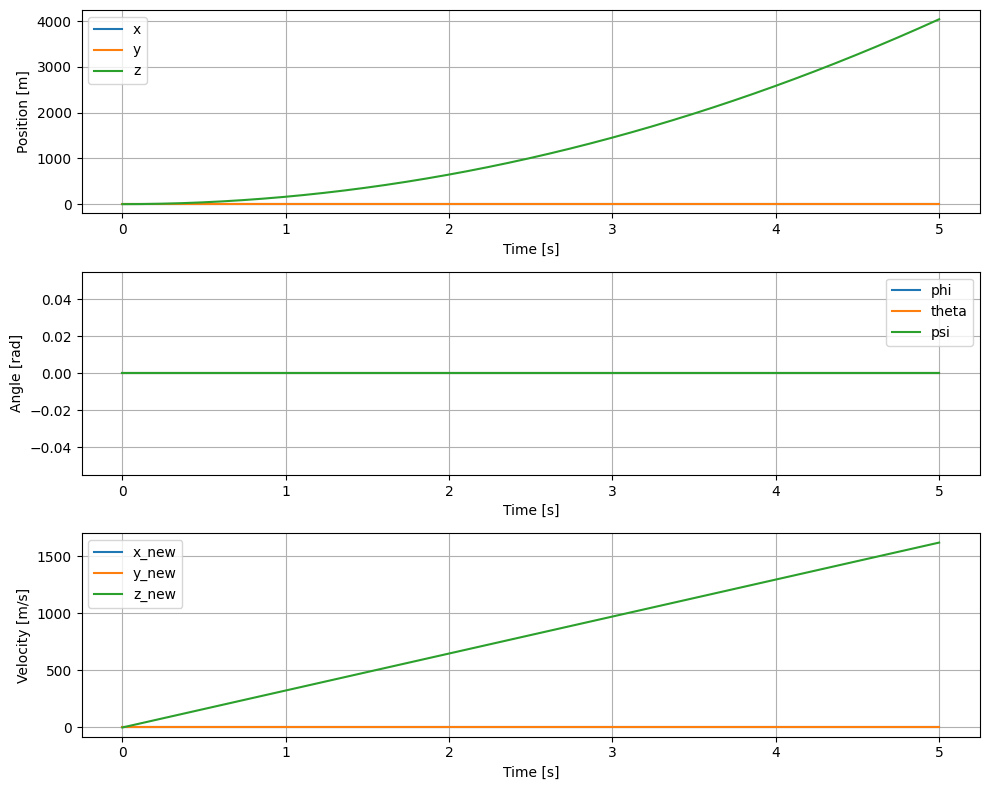

In [1]:
# %matplotlib widget
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Constants (example values, adjust as needed)
m = 3.0  # mass
g = 9.81  # gravity
I_x = 1.1  # moment of inertia
I_y = 1.1
I_z = 1.1
J_x = 0.01
l = 0.1
u1 = 50 # thrust force motor 1
u2 = 50 # thrust force motor 2
u3 = 50 # thrust force motor 3
u4 = 50 # thrust force motor 4

b = 0.1 # thrust factor
d = 0.1 # drag factor
U1 = b * (u1**2 + u2**2 + u3**2 + u4**2)
U2 = b * (u4**2+u1**2 - u2**2-u3**2)
U3 = b * (u3**2+u4**2 - u1**2-u2**2)
U4 = d * (-u1**2 + u2**2 - u3**2 + u4**2)

# print("U1: ", U1)
# print("U2: ", U2)
# print("U3: ", U3)
# print("U4: ", U4)

def drone_dynamics(t, state):
    x, x_new, y, y_new, z, z_new, phi, phi_new, theta, theta_new, psi, psi_new = state
    
    cos_phi = np.cos(phi)
    sin_phi = np.sin(phi)
    cos_theta = np.cos(theta)
    sin_theta = np.sin(theta)
    cos_psi = np.cos(psi)
    sin_psi = np.sin(psi)

    # Rz = np.array([[np.cos(np.pi/4), -np.sin(np.pi/4), 0],
    #                [np.sin(np.pi/4), np.cos(np.pi/4), 0],
    #                [0, 0, 1]])

    # U_rot = np.dot(Rz, np.array([U2, U3, U4]))
    # U2_rot = 0
    # U3_rot = U_rot[1]
    # U4_rot = U_rot[2]

    # print("U2_rot: ", U2)
    # print("U3_rot: ", U3)
    # print("U4_rot: ", U4)
    
    dx_new = (cos_phi * sin_theta * cos_psi + sin_phi * sin_psi) * U1 / m
    dy_new = (cos_phi * sin_theta * sin_psi - sin_phi * cos_psi) * U1 / m
    dz_new = -g + (cos_phi * cos_theta) * U1 / m

    # xyz_new_int = np.dot(Rz, np.array([dx_new_int, dy_new_int, dz_new_int]))

    # dx_new = xyz_new_int[0]
    # dy_new = xyz_new_int[1]
    # dz_new = xyz_new_int[2]

    dphi_new = l * U2 / I_x
    dtheta_new = l * U3 / I_y
    dpsi_new = U4 / I_z

    dx = x_new
    dy = y_new
    dz = z_new
    dphi = phi_new
    dtheta = theta_new
    dpsi = psi_new

    return [dx, dx_new, dy, dy_new, dz, dz_new, dphi, dphi_new, dtheta, dtheta_new, dpsi, dpsi_new]

# Initial conditions
initial_state = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

# Time span
t_span = (0, 5)  # simulate for 10 seconds
t_eval = np.linspace(0, 5, 1000)  # time points where the solution is evaluated

# Solve the ODE
solution = solve_ivp(drone_dynamics, t_span, initial_state, t_eval=t_eval, method='RK45')

# Extract the solution
time = solution.t
x, x_new, y, y_new, z, z_new, phi, phi_new, theta, theta_new, psi, psi_new = solution.y

# Plotting the results
plt.figure(figsize=(10, 8))

plt.subplot(3, 1, 1)
plt.plot(time, x, label='x')
plt.plot(time, y, label='y')
plt.plot(time, z, label='z')
plt.xlabel('Time [s]')
plt.ylabel('Position [m]')
plt.legend()
plt.grid()

plt.subplot(3, 1, 2)
plt.plot(time, phi, label='phi')
plt.plot(time, theta, label='theta')
plt.plot(time, psi, label='psi')
plt.xlabel('Time [s]')
plt.ylabel('Angle [rad]')
plt.legend()
plt.grid()

plt.subplot(3, 1, 3)
plt.plot(time, x_new, label='x_new')
plt.plot(time, y_new, label='y_new')
plt.plot(time, z_new, label='z_new')
plt.xlabel('Time [s]')
plt.ylabel('Velocity [m/s]')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


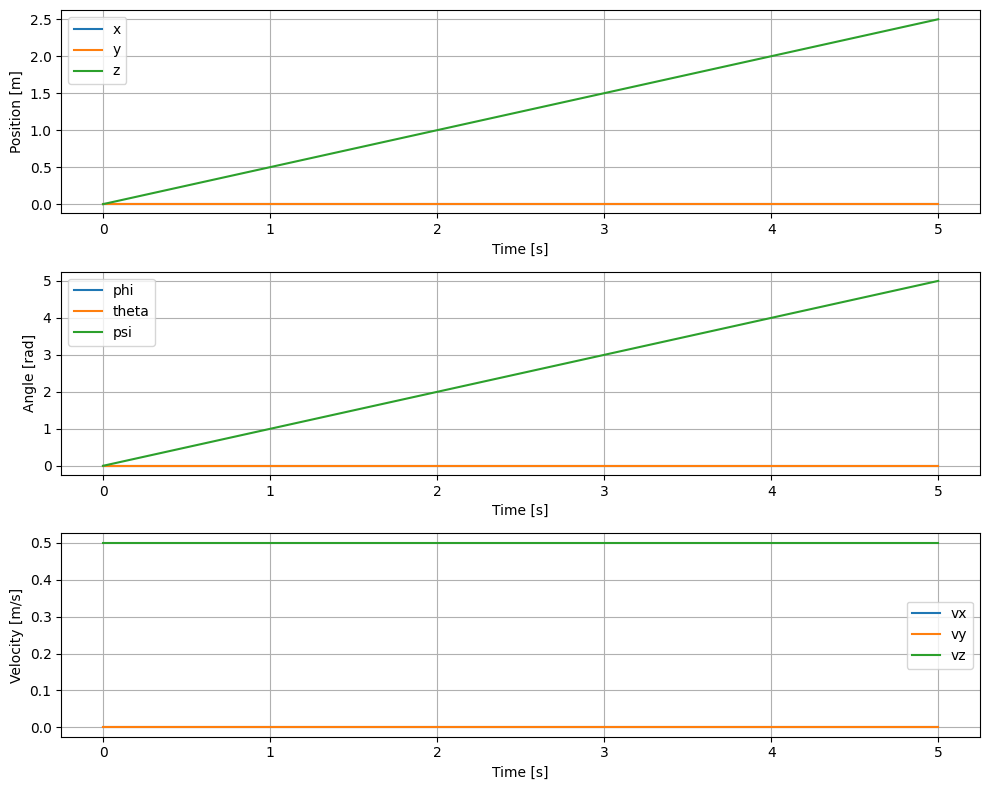

In [2]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Constants (example values, adjust as needed)
m = 3.0  # mass in kg
g = 9.81  # gravity in m/s^2
I_x = 1.1  # moment of inertia
I_y = 1.1
I_z = 1.1
l = 0.1

b = 0.1  # thrust factor
d = 0.1  # drag factor

# Desired constant upward velocity
v_z_desired = 2.0  # in m/s
dt = 0.01  # small time step for numerical integration

# Calculate the initial thrust needed for hovering
u_hover = np.sqrt(m * g / (4 * b))

# Define the time-dependent thrust function
def u(t):
    return u_hover

# Define the time-dependent inputs for each rotor
def u1(t):
    return u(t)

def u2(t):
    return u(t)

def u3(t):
    return u(t)

def u4(t):
    return u(t)

def drone_dynamics(t, state):
    x, vx, y, vy, z, vz, phi, phidot, theta, thetadot, psi, psidot = state

    # Time-dependent inputs
    U1 = b * (u1(t)**2 + u2(t)**2 + u3(t)**2 + u4(t)**2)
    U2 = b * (u4(t)**2 + u1(t)**2 - u2(t)**2 - u3(t)**2)
    U3 = b * (u3(t)**2 + u4(t)**2 - u1(t)**2 - u2(t)**2)
    U4 = d * (-u1(t)**2 + u2(t)**2 - u3(t)**2 + u4(t)**2)

    cos_phi = np.cos(phi)
    sin_phi = np.sin(phi)
    cos_theta = np.cos(theta)
    sin_theta = np.sin(theta)
    cos_psi = np.cos(psi)
    sin_psi = np.sin(psi)

    dvx = (cos_phi * sin_theta * cos_psi + sin_phi * sin_psi) * U1 / m
    dvy = (cos_phi * sin_theta * sin_psi - sin_phi * cos_psi) * U1 / m
    dvz = (cos_phi * cos_theta) * U1 / m - g

    dphidot = l * U2 / I_x
    dthetadot = l * U3 / I_y
    dpsidot = U4 / I_z

    dx = vx
    dy = vy
    dz = vz
    dphi = phidot
    dtheta = thetadot
    dpsi = psidot

    return [dx, dvx, dy, dvy, dz, dvz, dphi, dphidot, dtheta, dthetadot, dpsi, dpsidot]

# Initial conditions
initial_state = [0, 0, 0, 0, 0, .5, 0, 0, 0, 0, 0, 1]  # Initial upward velocity of 0 m/s

# Time span
t_span = (0, 5)  # simulate for 5 seconds
t_eval = np.linspace(0, 5, 1000)  # time points where the solution is evaluated

# Solve the ODE
solution = solve_ivp(drone_dynamics, t_span, initial_state, t_eval=t_eval, method='RK45')

# Extract the solution
time = solution.t
x, vx, y, vy, z, vz, phi, phidot, theta, thetadot, psi, psidot = solution.y

# Plotting the results
plt.figure(figsize=(10, 8))

plt.subplot(3, 1, 1)
plt.plot(time, x, label='x')
plt.plot(time, y, label='y')
plt.plot(time, z, label='z')
plt.xlabel('Time [s]')
plt.ylabel('Position [m]')
plt.legend()
plt.grid()

plt.subplot(3, 1, 2)
plt.plot(time, phi, label='phi')
plt.plot(time, theta, label='theta')
plt.plot(time, psi, label='psi')
plt.xlabel('Time [s]')
plt.ylabel('Angle [rad]')
plt.legend()
plt.grid()

plt.subplot(3, 1, 3)
plt.plot(time, vx, label='vx')
plt.plot(time, vy, label='vy')
plt.plot(time, vz, label='vz')
plt.xlabel('Time [s]')
plt.ylabel('Velocity [m/s]')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


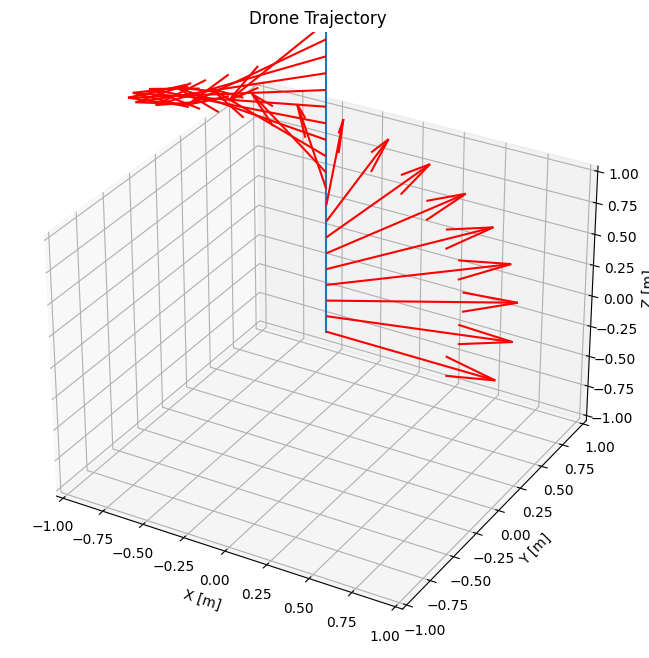

In [3]:
# 3d plot of the drone's trajectory
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z)
ax.set_xlabel('X [m]')
ax.set_ylabel('Y [m]')
ax.set_zlabel('Z [m]')
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)

# add arrow for drone orientation based on phi, theta, psi
arrow_length = 1.0
for i in range(0, len(x), 50):
    ax.quiver(x[i], y[i], z[i], arrow_length*np.cos(psi[i])*np.cos(theta[i]), arrow_length*np.sin(psi[i])*np.cos(theta[i]), -arrow_length*np.sin(theta[i]), color='red')

plt.title('Drone Trajectory')
plt.show()


MovieWriter stderr:
convert-im6.q16: no images defined `drone_trajectory.gif' @ error/convert.c/ConvertImageCommand/3258.



CalledProcessError: Command '['convert', '-size', '1000x800', '-depth', '8', '-delay', '5.0', '-loop', '0', 'rgba:-', '-layers', 'OptimizePlus', 'drone_trajectory.gif']' returned non-zero exit status 1.

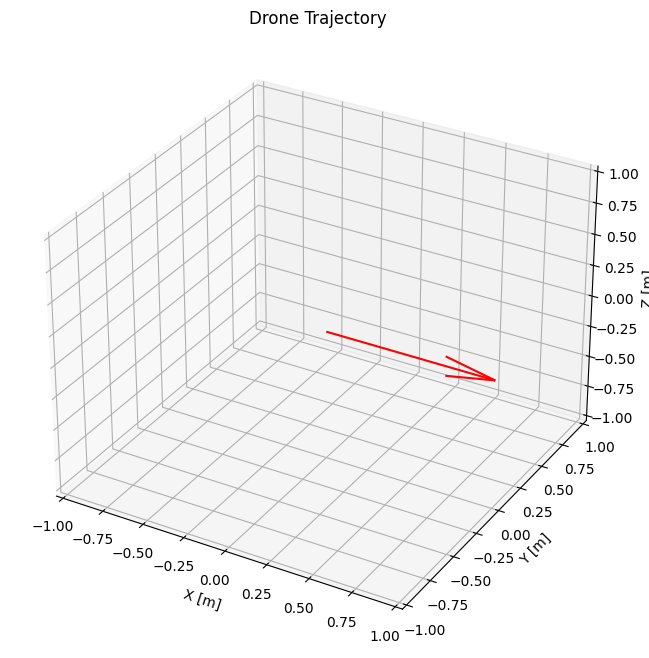

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
from scipy.integrate import solve_ivp

# Constants (example values, adjust as needed)
m = 3.0  # mass in kg
g = 9.81  # gravity in m/s^2
I_x = 1.1  # moment of inertia
I_y = 1.1
I_z = 1.1
l = 0.1

b = 0.1  # thrust factor
d = 0.1  # drag factor

# Desired constant upward velocity
v_z_desired = 2.0  # in m/s
dt = 0.01  # small time step for numerical integration

# Calculate the initial thrust needed for hovering
u_hover = np.sqrt(m * g / (4 * b))

# Define the time-dependent thrust function
def u(t):
    return u_hover

# Define the time-dependent inputs for each rotor
def u1(t):
    return u(t)

def u2(t):
    return u(t)

def u3(t):
    return u(t)

def u4(t):
    return u(t)

def drone_dynamics(t, state):
    x, vx, y, vy, z, vz, phi, phidot, theta, thetadot, psi, psidot = state

    # Time-dependent inputs
    U1 = b * (u1(t)**2 + u2(t)**2 + u3(t)**2 + u4(t)**2)
    U2 = b * (u4(t)**2 + u1(t)**2 - u2(t)**2 - u3(t)**2)
    U3 = b * (u3(t)**2 + u4(t)**2 - u1(t)**2 - u2(t)**2)
    U4 = d * (-u1(t)**2 + u2(t)**2 - u3(t)**2 + u4(t)**2)

    cos_phi = np.cos(phi)
    sin_phi = np.sin(phi)
    cos_theta = np.cos(theta)
    sin_theta = np.sin(theta)
    cos_psi = np.cos(psi)
    sin_psi = np.sin(psi)

    dvx = (cos_phi * sin_theta * cos_psi + sin_phi * sin_psi) * U1 / m
    dvy = (cos_phi * sin_theta * sin_psi - sin_phi * cos_psi) * U1 / m
    dvz = (cos_phi * cos_theta) * U1 / m - g

    dphidot = l * U2 / I_x
    dthetadot = l * U3 / I_y
    dpsidot = U4 / I_z

    dx = vx
    dy = vy
    dz = vz
    dphi = phidot
    dtheta = thetadot
    dpsi = psidot

    return [dx, dvx, dy, dvy, dz, dvz, dphi, dphidot, dtheta, dthetadot, dpsi, dpsidot]

# Initial conditions
initial_state = [0, 0, 0, 0, 0, .1, 0, 0, 0, 0, 0, 1]  # Initial upward velocity of 0 m/s

# Time span
t_span = (0, 5)  # simulate for 5 seconds
t_eval = np.linspace(0, 5, 1000)  # time points where the solution is evaluated

# Solve the ODE
solution = solve_ivp(drone_dynamics, t_span, initial_state, t_eval=t_eval, method='RK45')

# Extract the solution
time = solution.t
x, vx, y, vy, z, vz, phi, phidot, theta, thetadot, psi, psidot = solution.y

# Create the 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('X [m]')
ax.set_ylabel('Y [m]')
ax.set_zlabel('Z [m]')
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)
plt.title('Drone Trajectory')

arrow_length = 1.0

# Function to update the plot
def update(num):
    ax.cla()
    ax.plot(x[:num], y[:num], z[:num], color='blue')
    ax.set_xlabel('X [m]')
    ax.set_ylabel('Y [m]')
    ax.set_zlabel('Z [m]')
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    ax.set_zlim(-1, 1)
    plt.title('Drone Trajectory')
    
    # add arrow for drone orientation based on phi, theta, psi
    ax.quiver(x[num], y[num], z[num], arrow_length*np.cos(psi[num])*np.cos(theta[num]), arrow_length*np.sin(psi[num])*np.cos(theta[num]), -arrow_length*np.sin(theta[num]), color='red')

# Create the animation
ani = FuncAnimation(fig, update, frames=len(time), interval=50)

# Save the animation as a GIF
ani.save('drone_trajectory.gif', writer='imagemagick', fps=20)

# Display the GIF
from IPython.display import Image
Image(filename='drone_trajectory.gif')


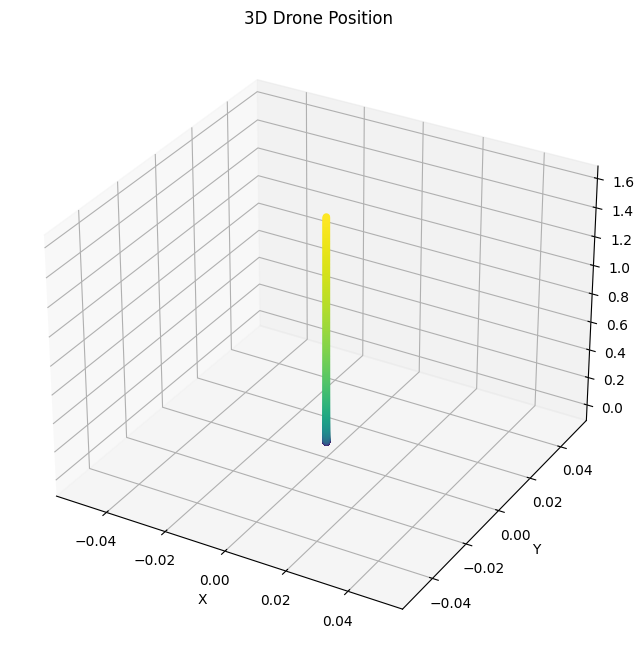

In [5]:
# for creating a responsive plot 

  
# importing required libraries 
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
plt.figure(figsize=(10, 8))
ax = plt.axes(projection='3d')
ax.plot3D(x, y, z, 'gray')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Drone Position')
ax.scatter3D(x, y, z, c=time, cmap='viridis')
# add arrows based on the angles and the velocity magnitude
# for i in range(0, len(x), 10):
#     ax.quiver(x[i], y[i], z[i], x_new[i], y_new[i], z_new[i], length=1, normalize=True)
# plt.tight_layout()
plt.show()


# Model Predictive Control 

In [6]:
import do_mpc

In [7]:
model_type = 'discrete' # either 'discrete' or 'continuous'
model = do_mpc.model.Model(model_type)

In [8]:
# Define the state variables
x = model.set_variable(var_type='_x', var_name='x', shape=(1,1))
y = model.set_variable(var_type='_x', var_name='y', shape=(1,1))
z = model.set_variable(var_type='_x', var_name='z', shape=(1,1))
phi = model.set_variable(var_type='_x', var_name='phi', shape=(1,1))
theta = model.set_variable(var_type='_x', var_name='theta', shape=(1,1))
psi = model.set_variable(var_type='_x', var_name='psi', shape=(1,1))
Vx = model.set_variable(var_type='_x', var_name='Vx', shape=(1,1))
Vy = model.set_variable(var_type='_x', var_name='Vy', shape=(1,1))
Vz = model.set_variable(var_type='_x', var_name='Vz', shape=(1,1))
dphi = model.set_variable(var_type='_x', var_name='dphi', shape=(1,1))
dtheta = model.set_variable(var_type='_x', var_name='dtheta', shape=(1,1))
dpsi = model.set_variable(var_type='_x', var_name='dpsi', shape=(1,1))

# Define the control variables
u1 = model.set_variable(var_type='_u', var_name='u1', shape=(1,1))
u2 = model.set_variable(var_type='_u', var_name='u2', shape=(1,1))
u3 = model.set_variable(var_type='_u', var_name='u3', shape=(1,1))
u4 = model.set_variable(var_type='_u', var_name='u4', shape=(1,1))




In [9]:
# # Import necessary modules
# import do_mpc
# from casadi import *
# import numpy as np
# import matplotlib.pyplot as plt

# # Create an instance of the model class
# model_type = 'continuous'  # Change to 'discrete' if your system is discrete
# model = do_mpc.model.Model(model_type)

# # Define state variables
# x1 = model.set_variable(var_type='_x', var_name='x1')
# x2 = model.set_variable(var_type='_x', var_name='x2')

# # Define control inputs
# u1 = model.set_variable(var_type='_u', var_name='u1')

# # Define system parameters (if any)
# # param1 = model.set_variable(var_type='_p', var_name='param1')

# # Define differential equations for your system
# # Update this section with your system dynamics
# dx1 = x2
# dx2 = -x1 + u1  # Example dynamics, replace with your own

# # Set the system dynamics
# model.set_rhs('x1', dx1)
# model.set_rhs('x2', dx2)

# # Setup model
# model.setup()

# # Create MPC controller
# mpc = do_mpc.controller.MPC(model)

# # Set MPC parameters
# setup_mpc = {
#     'n_horizon': 20,
#     't_step': 0.1,
#     'state_discretization': 'collocation',  # Use 'discrete' if your model is discrete
#     'store_full_solution': True,
# }
# mpc.set_param(**setup_mpc)

# # Define cost function
# # Update the objective function based on your requirements
# mterm = x1**2 + x2**2  # Terminal cost
# lterm = x1**2 + x2**2 + u1**2  # Stage cost

# mpc.set_objective(mterm=mterm, lterm=lterm)
# mpc.set_rterm(u1=0.1)  # Penalize control inputs

# # Setup MPC
# mpc.setup()

# # Create MPC simulator
# simulator = do_mpc.simulator.Simulator(model)
# simulator.set_param(t_step=0.1)

# # Setup simulator
# simulator.setup()

# # Define initial state
# x0 = np.array([0, 0])  # Update with your initial state

# # Set initial state in simulator
# simulator.x0 = x0

# # Run MPC
# u0 = np.array([0])  # Initial control input
# mpc.x0 = x0
# mpc.u0 = u0

# # Simulation loop
# for _ in range(100):
#     u0 = mpc.make_step(x0)
#     x0 = simulator.make_step(u0)

# # Plot results
# data = mpc.data
# fig, ax = plt.subplots(2, sharex=True)
# ax[0].plot(data['_x'][:, 0], label='x1')
# ax[0].plot(data['_x'][:, 1], label='x2')
# ax[1].plot(data['_u'][:, 0], label='u1')
# ax[0].legend()
# ax[1].legend()
# plt.show()


In [10]:
import importlib.util
import sys
import numpy as np
import matplotlib.pyplot as plt
# Define the file path
file_path = '/home/austin/Nonlinear_and_Data_Driven_Estimation/Drone/MPC_drone.py'
# set wx to line with slope of 2
wx=t**2+1
wy=t**2+2
wz=t**2+3
# Define the module name
module_name = 'MPC_drone'

# Load the module
spec = importlib.util.spec_from_file_location(module_name, file_path)
MPCD = importlib.util.module_from_spec(spec)
sys.modules[module_name] = MPCD
spec.loader.exec_module(MPCD)

NameError: name 't' is not defined

['vx', 'vy', 'vz', 'phi', 'phidot', 'theta', 'thetadot', 'psi', 'psidot', 'wx', 'wy', 'wz']
[[0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [1.00502513]
 [1.        ]
 [2.        ]
 [3.        ]]
[[ 0.        ]
 [ 0.        ]
 [-0.0981    ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.01005025]
 [ 1.00502513]
 [ 1.        ]
 [ 2.        ]
 [ 3.        ]]
[[ 0.        ]
 [ 0.        ]
 [-0.1962    ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.0201005 ]
 [ 1.00502513]
 [ 1.        ]
 [ 2.        ]
 [ 3.        ]]
[[ 0.        ]
 [ 0.        ]
 [-0.2943    ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.03015075]
 [ 1.00502513]
 [ 1.        ]
 [ 2.        ]
 [ 3.        ]]
[[ 0.        ]
 [ 0.        ]
 [-0.3924    ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.04020101]
 [ 1.00502513]
 [ 1.        ]
 [ 2.        ]
 [ 3.        ]]
[[ 0.        ]


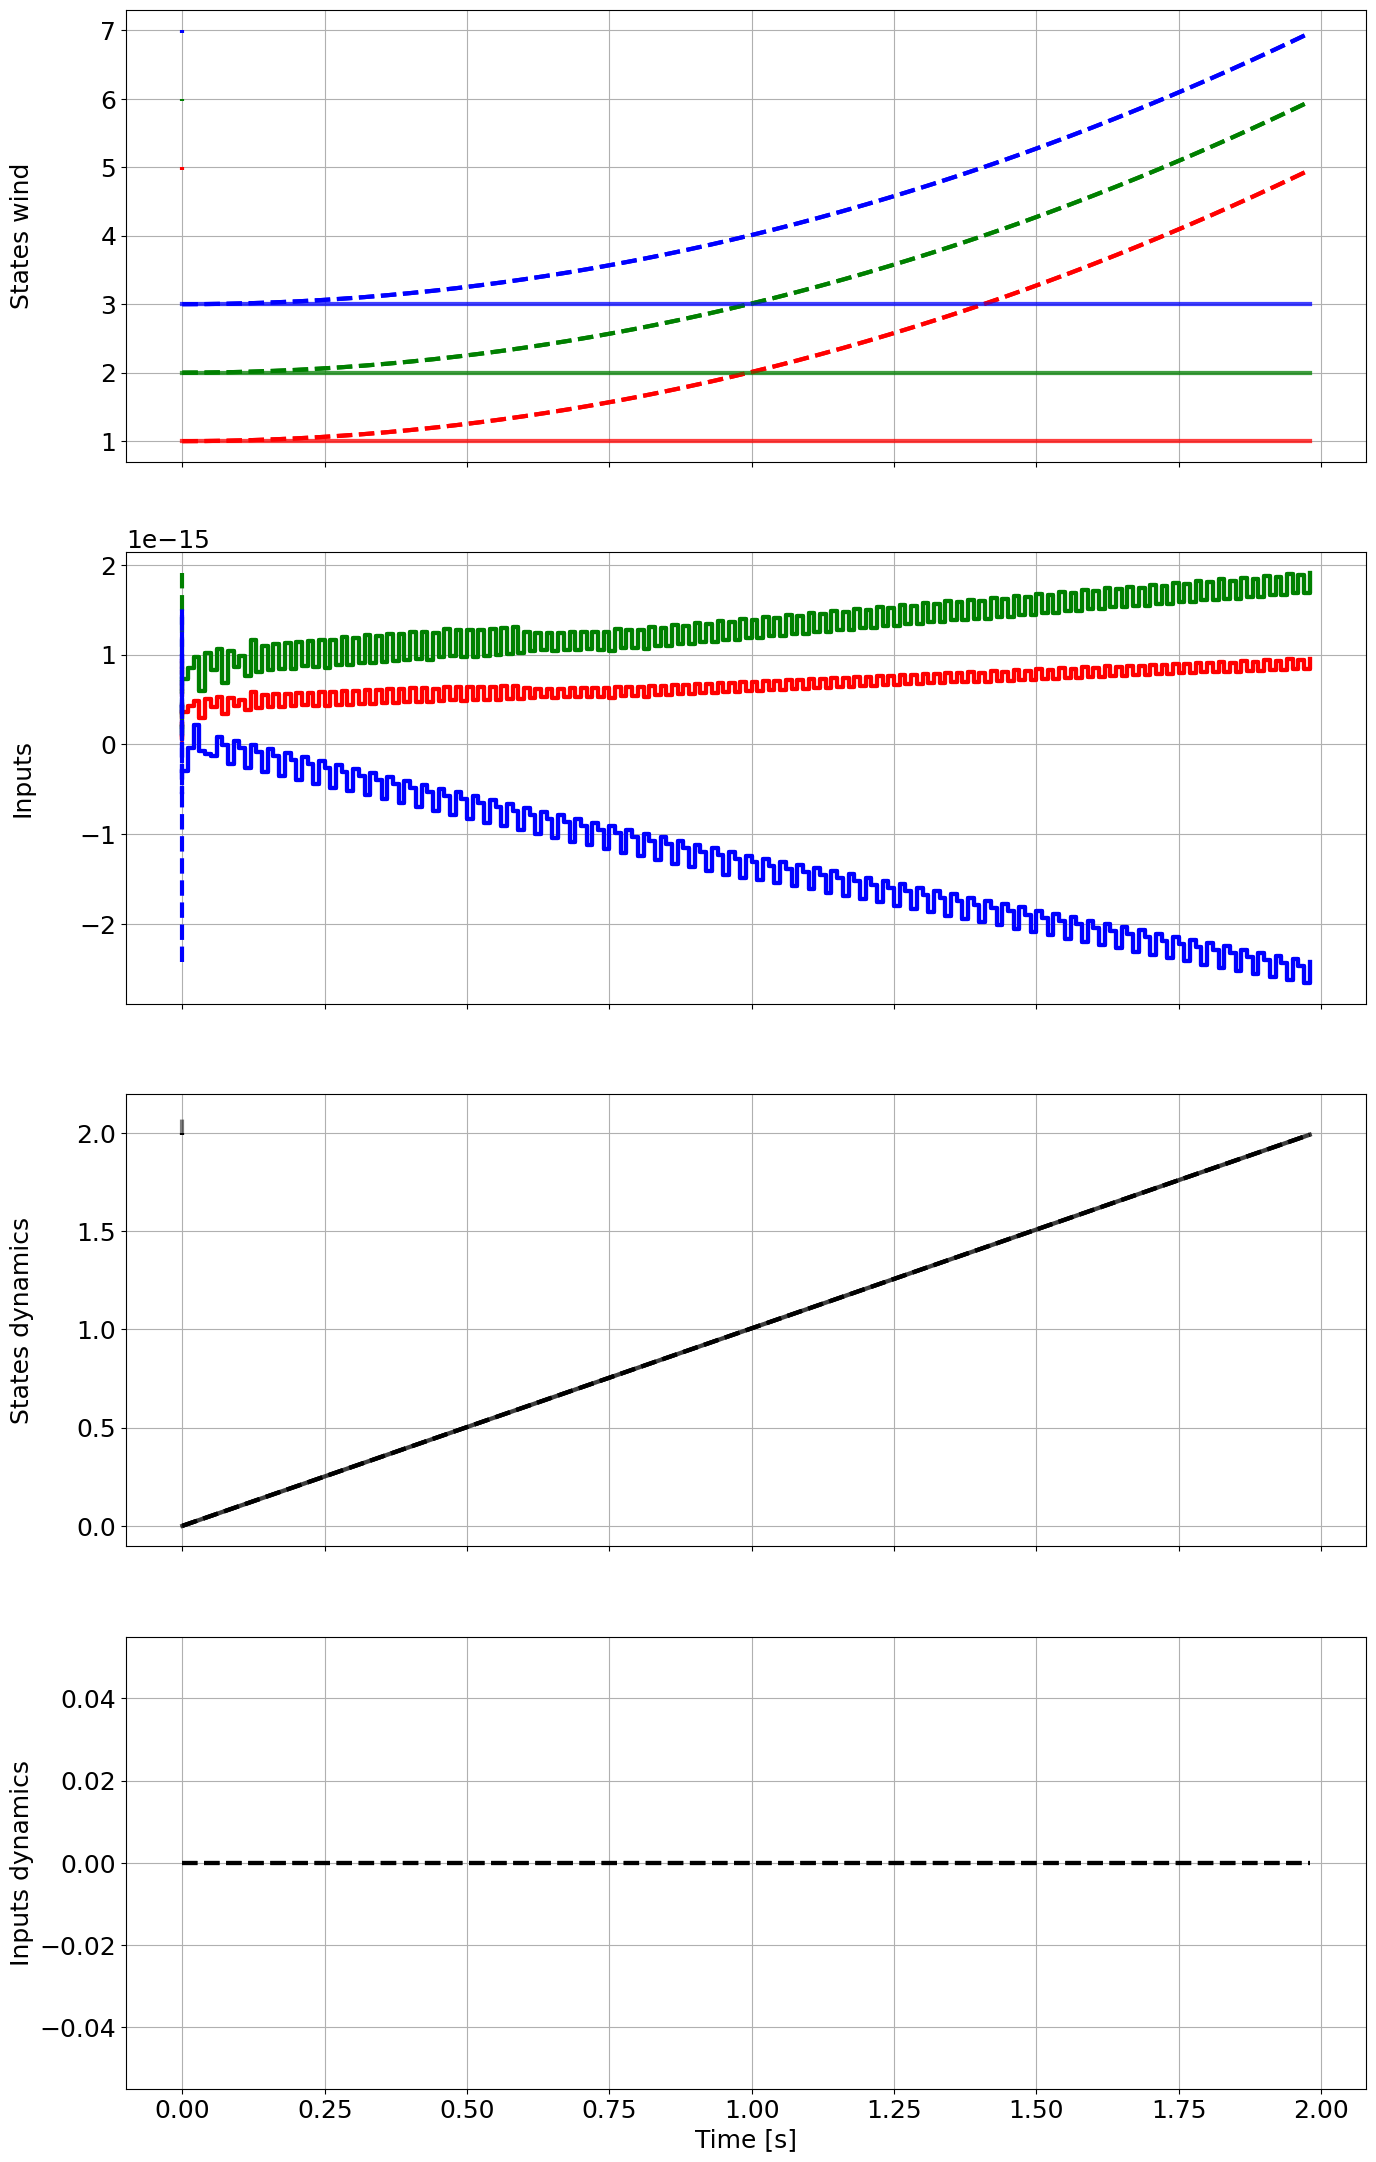

In [ ]:
T_length=200
dt=.01
# make vx sin wave
t=np.linspace(0,T_length*dt,T_length)
vx=np.full (T_length,0.0)
vy=np.full (T_length,0.0)
vz=np.full (T_length,0.0)
psi=t
# set wx to line with slope of 2
wx=t**2+1
wy=t**2+2
wz=t**2+3


mpc=MPCD.MpcDrone(vx=vx, vy=vy, vz=vz, psi=psi, wx=wx, wy=wy, wz=wz, dt=dt, n_horizon=10, r_weight=0.0)